# Prédiction de la série A, C ou D

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import tree
# Ensemble Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
#from sklearn import cross_validation
from sklearn.model_selection import KFold, cross_val_score
import sklearn.model_selection as ms
from sklearn import metrics

from matplotlib import pyplot as plt
%matplotlib inline

## Load Data  for Classification

In [2]:
data = pd.read_csv('MoyennesBinairesSeptembre22.csv',encoding='latin-1')
names = ['Mm6','Mp6','Ms6','Mm5','Mp5','Ms5','Mm4','Mp4','Ms4','Mm3','Mp3','Ms3','S']
data.head()

,Mm6,Mp6,Ms6,Mm5,Mp5,Ms5,Mm4,Mp4,Ms4,Mm3,Mp3,Ms3,MS,S
0,17,16,17,17,17,19,16,16,14,15,15,14,15.44,2
1,14,13,14,15,15,16,12,13,14,10,8,9,13.79,1
2,16,16,18,16,17,20,16,14,16,13,14,13,14.36,1
3,14,13,11,12,15,15,10,12,12,10,10,9,11.18,1
4,15,10,14,11,12,13,12,12,12,8,9,9,11.37,0


(-0.5, 2.5)

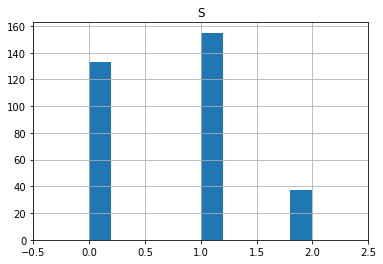

In [3]:
data['S'].value_counts()
#class distribution
data.hist(column = 'S')
plt.xlim(-0.5,2.5)

In [4]:
# créer la matrice de données
X = data.iloc[:,0:12].values

# créer le vecteur d'étiquettes
y = data.iloc[:,13].values 

## CrossValidation Strategy - Model selection

In [5]:
CV_generator = KFold(n_splits=10, shuffle=True).split(X,y)
#nb folds of cross validation
for (train_idx, test_idx) in CV_generator:
    print("train_size:",len(train_idx),"some-train-indexes:", train_idx[:10]) 
    print("train_size:",len(test_idx), "some-test-indexes:", test_idx[:10]) 
    input()

train_size: 292 some-train-indexes: [ 0  1  2  3  5  6  7  8  9 10]
train_size: 33 some-test-indexes: [ 4 16 22 26 28 57 58 65 87 91]

train_size: 292 some-train-indexes: [ 0  1  2  3  4  5  6  8  9 10]
train_size: 33 some-test-indexes: [  7  11  14  33  43  60  94 104 110 125]

train_size: 292 some-train-indexes: [0 1 2 3 4 5 6 7 8 9]
train_size: 33 some-test-indexes: [ 13  17  21  40  47  62  80  84  92 105]

train_size: 292 some-train-indexes: [ 0  1  2  3  4  6  7  8  9 11]
train_size: 33 some-test-indexes: [ 5 10 12 24 50 54 59 68 73 77]

train_size: 292 some-train-indexes: [ 0  1  2  4  5  7  8  9 10 11]
train_size: 33 some-test-indexes: [ 3  6 15 19 23 36 38 56 66 67]

train_size: 293 some-train-indexes: [0 1 2 3 4 5 6 7 8 9]
train_size: 32 some-test-indexes: [ 25  30  31  45  52  55  72  76  95 103]

train_size: 293 some-train-indexes: [ 0  3  4  5  6  7  8 10 11 12]
train_size: 32 some-test-indexes: [  1   2   9  44  46  71  74  75  98 111]

train_size: 293 some-train-indexes:

In [6]:
kfold=10

##### 1- Decision Tree

In [7]:
dtc = tree.DecisionTreeClassifier(max_depth=5)
scores = cross_val_score(dtc, X, y, cv=kfold)
print(" dtc Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

 dtc Accuracy: 0.82 (+/- 0.07)


##### 2- Random Forest 

In [38]:
rfc = RandomForestClassifier(n_estimators=50) # n_estimators=?, max_features=?
scores = cross_val_score(rfc, X, y, cv=kfold)
print(" rfc Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

 rfc Accuracy: 0.90 (+/- 0.10)


##### 3- Linear SVC

In [39]:
from sklearn import svm
lsvc = svm.SVC(kernel='linear')
scores = cross_val_score(lsvc, X, y, cv=kfold)
print("lsvc accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

lsvc accuracy: 0.90 (+/- 0.08)


##### 4- KNN

In [40]:
from sklearn import neighbors, metrics, model_selection
#Nous découpons nos données en un jeu d'entrainement et un jeu de test

from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.1)
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 15}
Résultats de la validation croisée :
accuracy = 0.863 (+/-0.058) for {'n_neighbors': 3}
accuracy = 0.849 (+/-0.069) for {'n_neighbors': 5}
accuracy = 0.860 (+/-0.040) for {'n_neighbors': 7}
accuracy = 0.856 (+/-0.093) for {'n_neighbors': 9}
accuracy = 0.863 (+/-0.084) for {'n_neighbors': 11}
accuracy = 0.860 (+/-0.073) for {'n_neighbors': 13}
accuracy = 0.867 (+/-0.093) for {'n_neighbors': 15}


In [41]:
knn = neighbors.KNeighborsClassifier(n_neighbors=9)
scores = cross_val_score(knn, X, y, cv=kfold)
print("knn accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

knn accuracy: 0.85 (+/- 0.12)


##### 5- Logistic Regression

In [42]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

lr = LogisticRegression(solver = 'liblinear')

In [43]:
scores = cross_val_score(lr, X, y, cv=kfold)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.71 (+/- 0.15)


## TrainTest Strategy - Model evaluation

### Split TrainTest

In [48]:
import sklearn.utils
data = sklearn.utils.shuffle(data)
data['is_train'] = np.random.uniform(0, 1, len(data)) <= 3/4 #.75
train, test = data[data['is_train']==True], data[data['is_train']==False]
print("size train/test: {0}/{1}".format(train.shape[0], test.shape[0]))
X_train, y_train = train[names[:-1]], train['S']
X_test, y_test = test[names[:-1]], test['S']

size train/test: 259/66


### Performance evaluation

In [49]:
from sklearn import metrics

In [50]:
clf_map = {'DecisionTree': dtc,'RandomForest': rfc, 'LinearSVC': lsvc, 'KNN': knn, 'LogisticRegression':lr }
clf_preds_map = {}
for cname, clf in clf_map.items():
    clf.fit(X_train, y_train)
    clf_preds_map[cname] = clf.predict(X_test)

##### Accuracy

In [51]:
for cname, _ in clf_map.items():
    print("=> {0} accuracy = [{1:.2f}]]".format(cname, metrics.accuracy_score(y_test,clf_preds_map[cname])))

=> DecisionTree accuracy = [0.86]]
=> RandomForest accuracy = [0.92]]
=> LinearSVC accuracy = [0.95]]
=> KNN accuracy = [0.94]]
=> LogisticRegression accuracy = [0.82]]


In [52]:
for cname, _ in clf_map.items():
    print(cname,metrics.f1_score(y_test,clf_preds_map[cname], average=None))

DecisionTree [0.9        0.85245902 0.72727273]
RandomForest [0.91803279 0.92063492 1.        ]
LinearSVC [0.94915254 0.95384615 1.        ]
KNN [0.93103448 0.93939394 1.        ]
LogisticRegression [0.84745763 0.82352941 0.4       ]


##### Confusion matrix

In [53]:
conf_map = {}
for cname, _ in clf_map.items():
    conf_map[cname]=metrics.confusion_matrix(y_test, clf_preds_map[cname])

Confusion Matrix of the 5 Classifiers


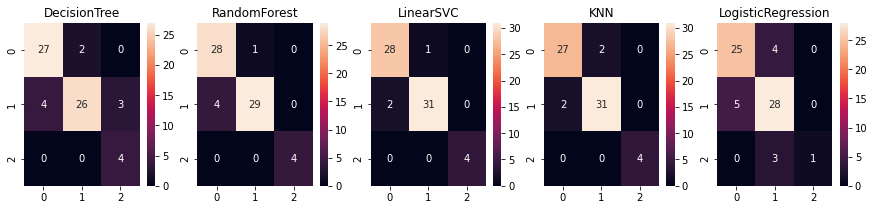

In [54]:
import seaborn as sns
plt.figure(figsize=(15, 3))
print('Confusion Matrix of the 5 Classifiers')
nb_cls = len(clf_map)
plt.subplot(1, nb_cls, 1) # starts from 1
for i, cname in enumerate(conf_map):
    plt.subplot(1, nb_cls, i+1)
    plt.title(cname);
    sns.heatmap(conf_map[cname], annot=True,  fmt='')